* Let's calculate the frequency of the words from the content
* We use the same function to download the content from the wikipedia page

In [1]:
# We use the content from the Wikipedia page

import requests

def wikipedia_page(title) : 
    '''This function returns the raw text of a wikipedia page
    given a wikipedia page title'''
    
    params = {
        'action' : 'query',
        'format' : 'json', # request json formatted content
        'titles' : title, # title of the wikipedia page
        'prop' : 'extracts',
        'explaintext' : True
    }
    
    # send a request to wikipedia page API
    response = requests.get(
        'https://en.wikipedia.org/w/api.php',
        params=params
                           ).json()
    
    # Parse the results
    page = next(iter(response['query']['pages'].values()))
    
    # Return the page content
    if 'extract' in page.keys():
        return page['extract']
    else : 
        return 'Page not found'

In [2]:
# Let's download the wikipedia Earh page's content

import requests

# Get 'Earth' page
text = wikipedia_page('Earth').lower()

# Print the begining of the text
print(text[:200]+"......")

earth is the third planet from the sun and the only astronomical object known to harbor life. this is enabled by earth being a water world, the only one in the solar system sustaining liquid surface w......


* Now count the frequency of the words.
* It will help to identify the non-subject-specific words that appear too frequently.
* Counting the frequency of words is a 2 step process :
    1. Splitting the words in the text
    2. Counting each words that how many times they appear in the text

In [3]:
# Import the counter function to calculate the frequency
from collections import Counter

# Transform the text into list of words
# by splitting them using the whitespace (' ')
wordList = text.split(' ')

# Count the word frequency
wordCounts = Counter(wordList)

The resulted `wordCounts` is a dictionary, where :
* **key** -> each word
* **value** -> Number of times that the word has appeared in the text

In [4]:
# Lets print the 20 most common words
for w in wordCounts.most_common(20) :
    print(f'{w[0]}:\t{w[1]}')

the:	706
of:	363
and:	283
is:	172
to:	166
in:	149
a:	138
earth's:	115
by:	76
with:	75
as:	72
from:	69
earth:	68
at:	58
that:	58
are:	49
surface:	44
it:	43
about:	43
this:	41


#### Stopwords : 
Are the words that do not provide any useful information to infer the content or nature of a text. It may be because they do not carry any meaning(prepositions, conjuction, etc.) or because they are too frequent

In [5]:
# Remove the Stopwords from the list 'wordList'

# Define the stopewords that we want to remove
stopwords = ['the', 'of', 'and', 'is', 'to', 'in', 'a', 'from', 'by', 'with', \
             'as', 'at', 'that', 'are', 'it', 'about', 'this', 'an', 'are', 'its', 'for'\
            'on', 'has', 'been', 'than', 'which']

# lets remove the stopwords and store the rest in another variable
words_without_stopwords = [ word for word in wordList if word not in stopwords ]

# Other way of writing the above line : 
# words_without_stopwords = []
# for word in wordList :
#     if word not in stopwords :
#         words_without_stopwords.append(word)

In [6]:
# Now we'll check the 20 most common words without stopwords
Counter(words_without_stopwords).most_common(20)

[("earth's", 115),
 ('earth', 68),
 ('surface', 44),
 ('solar', 40),
 ('on', 40),
 ('water', 36),
 ('million', 36),
 ('have', 35),
 ('for', 32),
 ('into', 32),
 ('or', 31),
 ('crust', 28),
 ('most', 27),
 ('life', 27),
 ('land', 26),
 ('sun', 25),
 ('other', 25),
 ('be', 24),
 ('over', 24),
 ('atmosphere', 23)]

### create the wordcloud using the words_without_stopwords list

(-0.5, 399.5, 199.5, -0.5)

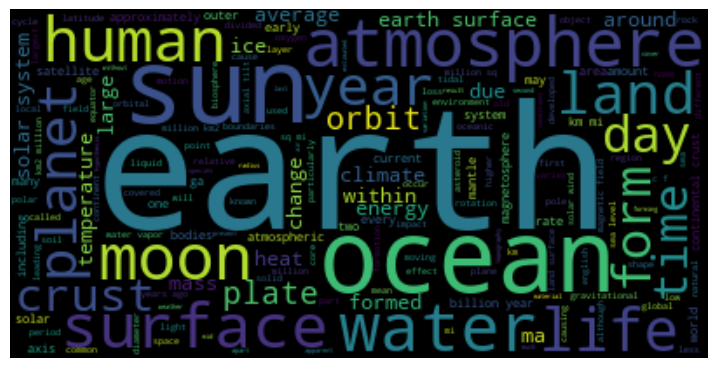

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordCloud = WordCloud()

# Before applying the wordcloud function, we need to make the list as text
text_without_stopwords = ' '.join(words_without_stopwords)

wordCloud.generate(text_without_stopwords)

fig, ax = plt.subplots(1,1, figsize=(9,6))

plt.imshow(wordCloud, interpolation='bilinear')

plt.axis('off')

In [8]:
# WordCloud comes with its own list of stopwords

print(f"Wordcloud has {len(WordCloud().stopwords)} stopwords:")
print(list(WordCloud().stopwords))

Wordcloud has 192 stopwords:
['does', 'why', 'during', 'other', "how's", "hasn't", 'do', 'over', 'com', 'k', 'having', 'like', "that's", "they've", "you're", 'into', 'no', 'these', 'this', 'above', 'yourselves', "we'll", "we're", 'herself', 'were', 'you', "hadn't", 'him', "don't", 'that', 'can', 'until', 'any', "you'll", 'because', 'here', 'himself', 'who', 'on', "where's", 'such', "let's", 'then', 'of', 'if', 'also', "he's", 'therefore', 'them', "they'd", 'www', 'myself', 'otherwise', 'so', 'themselves', 'as', "you'd", 'being', 'by', 'are', 'below', "won't", 'all', "it's", 'my', 'only', 'down', "she's", 'theirs', 'r', 'yourself', 'ought', 'the', "i'm", 'an', 'where', 'from', 'his', "she'd", 'their', "wasn't", 'when', 'shall', 'out', 'to', 'hence', 'her', "he'd", 'further', 'cannot', "shan't", 'had', 'would', 'your', 'but', 'get', 'up', 'there', 'doing', 'once', 'me', 'could', 'some', "we've", "she'll", 'its', 'not', 'yours', 'ours', 'most', 'in', "weren't", 'a', 'else', 'after', 'our'